# Tarea 1 MCMC Metropolis Multiples Caminadores

In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import distributions

In [2]:
data=np.load('fit_exercise.npy')

In [3]:
def calc_posterior(a, b, t=data[2], y=data[1], x=data[0]):     #función para encontrar el postirior   
    #usando un Prior Gausiano Plano tenemos que Prior=1, entonces, como Ln(1)=0 tendremos que el postirior tiene solo 
    #la contribución del likelihood
    logp=0
    mu = a + b*x                          #calculamos el valore del modelo segun los datos (modelo lineal)
    logp += -0.5*np.sum(np.log(2*np.pi*t**2)+(y - mu)**2/(t**2))      # sumatoria del likelihood (t es el sigma propuesto)
    
    return logp

In [4]:
def metropolis(n_iterations, initial_values, prop_var):
             
    evolution = np.zeros((n_iterations+1, len(initial_values)))  #en esta matriz se guardará los parametros a, b y sigma
    evolution_R= np.zeros((n_iterations+1, len(initial_values))) #se gurdarán todos los valores rechazados y aceptados
    evolution[0] = initial_values     
    evolution_R[0] = initial_values
    current_log_prob = calc_posterior(*evolution[0])  #llamado a la función con entradas como vector de los parametros
    accepted = [0]*len(initial_values)                #contador de cuantas veces se rechazó o se guardó el parametro

    for i in range(n_iterations):      
        current_params = evolution[i]   #paramatros iniciales para los valores que se calcularan 
        for j in range(len(initial_values)):        
            p = evolution[i].copy()     #Realiza una copia de la fila i-esima para calcular nuevamente el postirior y comparar
            theta = np.random.normal (current_params[j], prop_var)    #se crean los numeros aleatorios de a, b y sigma    
            p[j] = theta                             #p contiene los parametros con los que se calculara el nuevo posterior
            proposed_log_prob = calc_posterior(*p)   #se calcula el postitior con los valores de p propuestos
            alpha = proposed_log_prob - current_log_prob #se calcula el ratio de los postiriors (nuevo - viejo)
            
            if np.log(np.random.rand()) < alpha:  
                evolution[i+1,j] = theta
                current_log_prob = proposed_log_prob    #se acepta el nuevo prior y se guarda
                accepted[j] += 1                        #contador de veces aceptado
            else:                      
                evolution[i+1,j] = evolution[i,j]
            
            evolution_R[i+1,j] = p[j]                   #se guardan todos los valores para graficar
                
    return evolution, evolution_R

In [6]:
n_iterations=10000
prop_des=.05
walkers=5
alpha=-5
beta=5

initial_values=[np.random.uniform(alpha, beta),np.random.uniform(alpha,beta)]
E_W=np.zeros((walkers,n_iterations+1,len(initial_values)))      #evolution walker acepted
E_W_R=np.zeros((walkers,n_iterations+1,len(initial_values)))    #evolution walker reject


for l in range (0,walkers):
    initial_values=[np.random.uniform(alpha, beta),np.random.uniform(alpha,beta)]
    evolution = metropolis(n_iterations,initial_values,prop_des)        
    E_W[l]=evolution[0]      #guarda los valores aceptados de la evolución de cada uno de los llamados a la función metropolis
    E_W_R[l]=evolution[1]    #guarda los todos los valores aceptados y rechazados para graficar al fondo

    
iteration= np.arange(len(E_W[l,:,0]))
E_W[l]

array([[ 0.52845707,  2.18400073],
       [ 0.52845707,  2.1433517 ],
       [ 0.46904939,  2.12315016],
       ...,
       [ 5.41416688, -1.10625628],
       [ 5.41416688, -1.10625628],
       [ 5.41132566, -1.10625628]])

# Graficos

[ 5.49357568 -1.11190799]
[ 5.4857171  -1.11063195]
[ 5.54376665 -1.12562882]
[ 5.48036809 -1.09586608]
[ 5.41132566 -1.10625628]


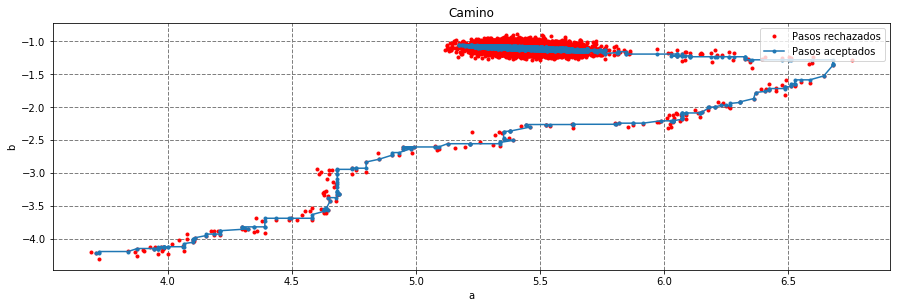

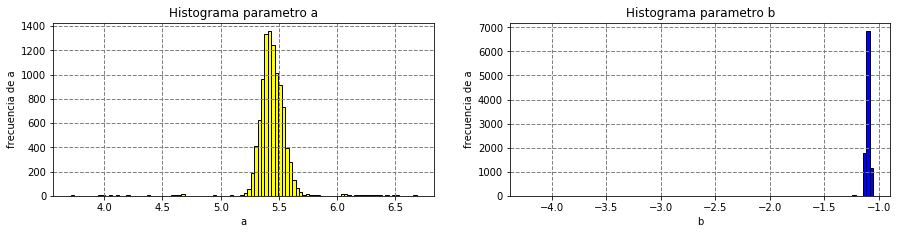

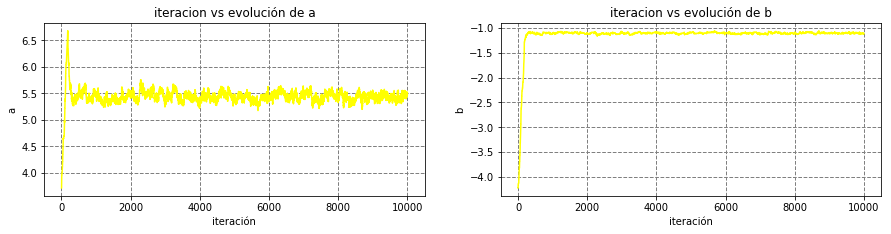

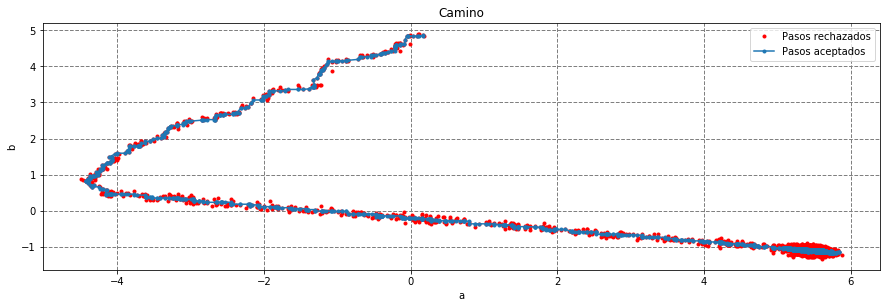

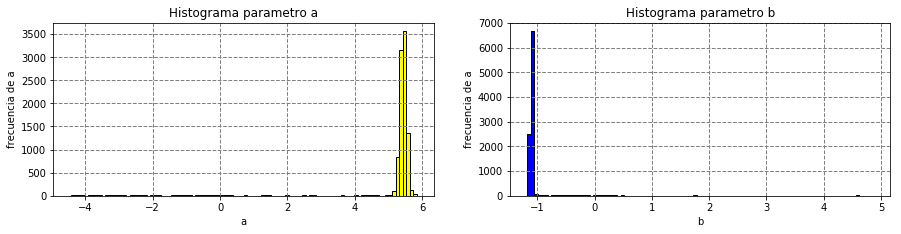

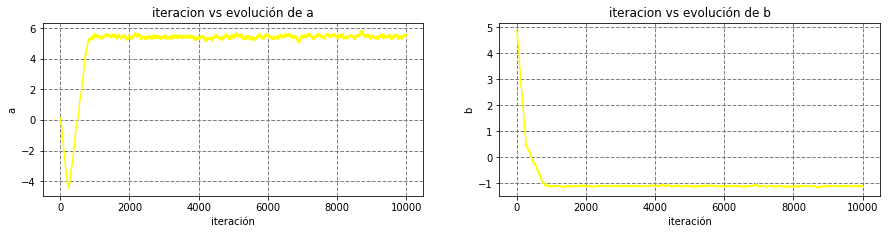

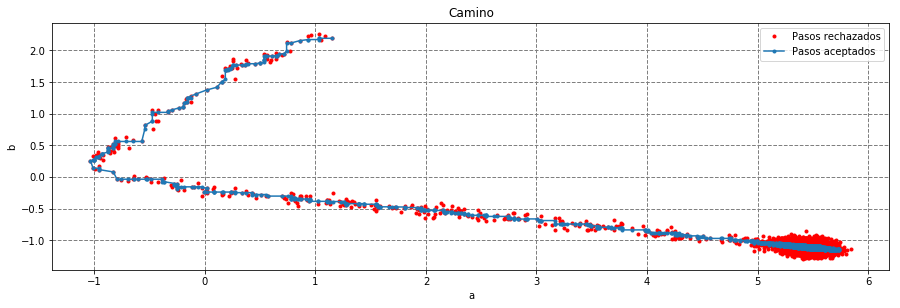

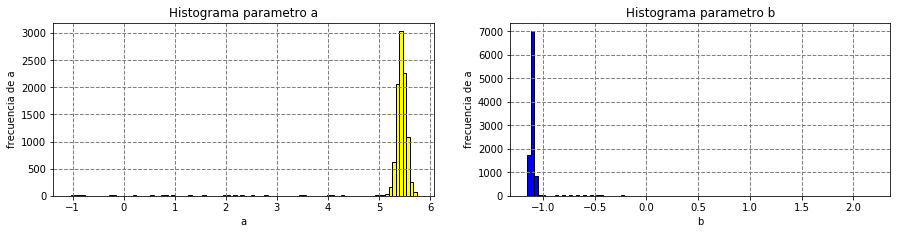

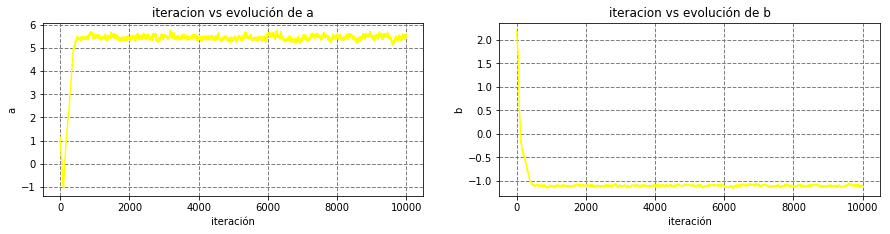

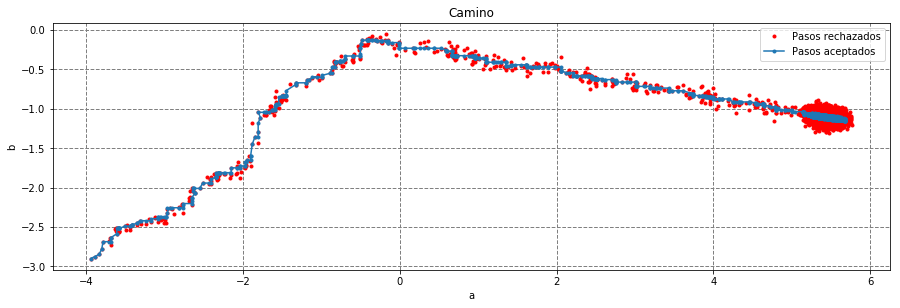

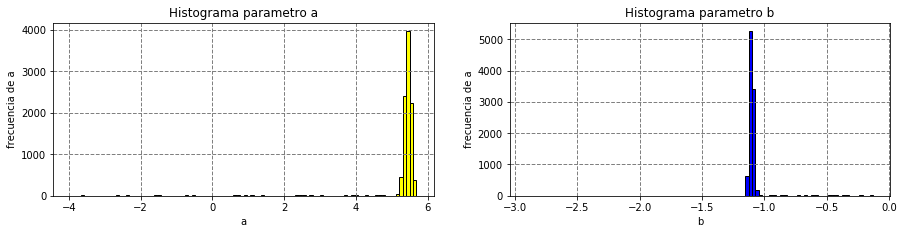

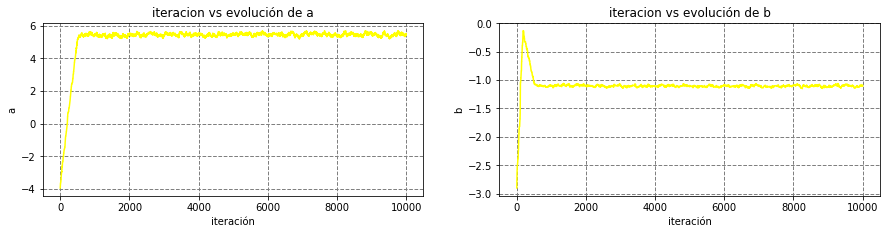

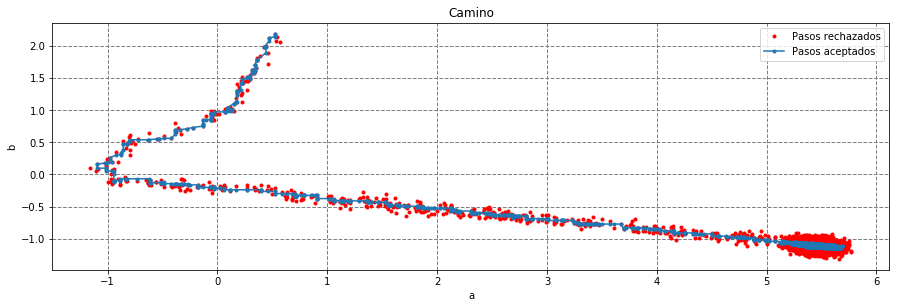

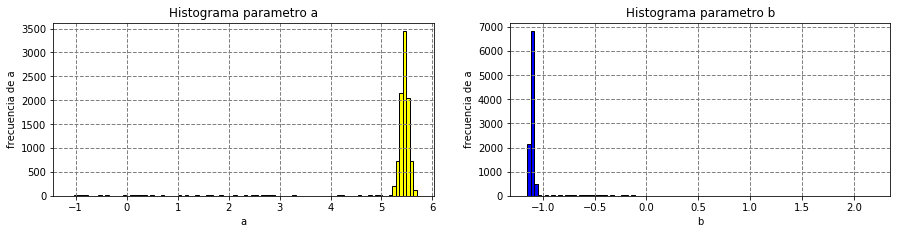

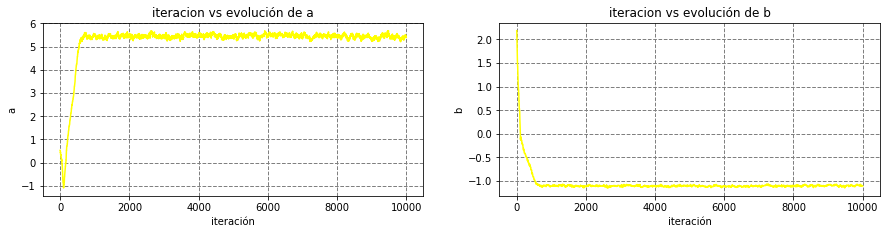

In [7]:
#caminos
for ll in range (walkers):
    plt.figure(figsize=(15,10))
    plt.subplot(2,1,2)
    plt.plot(E_W_R[ll,:,0],E_W_R[ll,:,1],'.', color='red')
    plt.plot(E_W[ll,:,0],E_W[ll,:,1],'.-')
    plt.title("Camino")
    plt.xlabel("a")              
    plt.ylabel("b") 
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.legend(('Pasos rechazados', 'Pasos aceptados'), loc='upper right')
    print(E_W[ll,-1,:])

#histogramas    
    plt.figure(figsize=(15,7))
    plt.subplot(2,2,1)
    plt.hist(E_W[ll,:,0],100,color='yellow',edgecolor='black',label='parametro b');
    plt.title("Histograma parametro a")
    plt.xlabel('a')              
    plt.ylabel('frecuencia de a')               
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

    plt.subplot(2,2,2)
    plt.hist(E_W[ll,:,1],100,color='blue',edgecolor='black',label='parametro a');
    plt.title("Histograma parametro b")
    plt.xlabel("b")              
    plt.ylabel("frecuencia de a") 
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    
#cambios de parametros en las iteraciones
    plt.figure(figsize=(15,7))
    plt.subplot(2,2,1)
    plt.plot(iteration,E_W[ll,:,0],color='yellow',label='parametro b');
    plt.title("iteracion vs evolución de a")
    plt.xlabel('iteración')              
    plt.ylabel('a')               
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

    plt.subplot(2,2,2)
    plt.plot(iteration,E_W[ll,:,1],color='yellow',label='parametro a');
    plt.title("iteracion vs evolución de b")
    plt.xlabel('iteración')              
    plt.ylabel('b')   
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

# Probando la libreria getdist

In [8]:
from getdist import plots, gaussian_mixtures
from getdist import plots, MCSamples

Removed no burn in
Removed no burn in


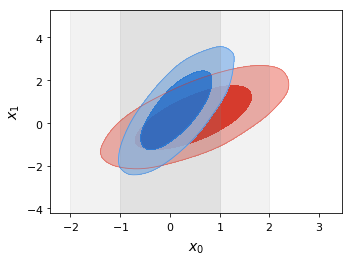

In [9]:
samples1, samples2 = gaussian_mixtures.randomTestMCSamples(ndim=2, nMCSamples=2)
g = plots.get_single_plotter(width_inch=5)
g.plot_2d([samples1, samples2], ['x0','x1'], filled=True);
g.add_x_bands(0, 1) #(center, +- gris y +- menos gris)

In [10]:
E_W[2,:,1]

array([ 2.19249597,  2.19249597,  2.19249597, ..., -1.12562882,
       -1.12562882, -1.12562882])

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


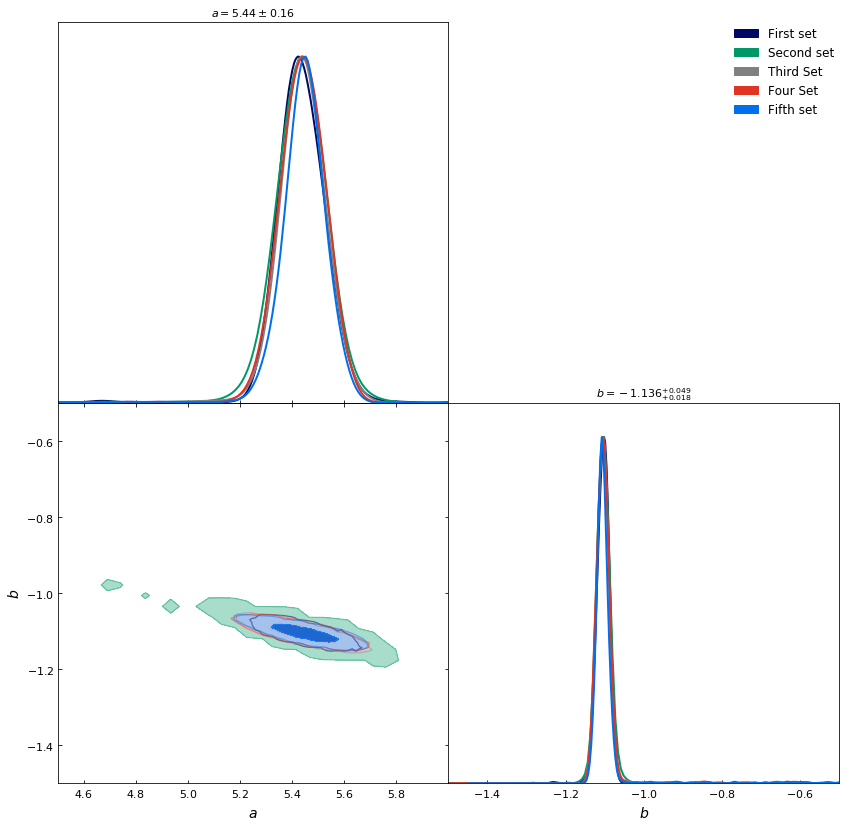

In [12]:
## samples1, samples2 = gaussian_mixtures.randomTestMCSamples(ndim=3, nMCSamples=2)
Samps1=np.array([E_W[0,:,0].T,E_W[0,:,1].T]).T
Samps2=np.array([E_W[1,:,0].T,E_W[1,:,1].T]).T
Samps3=np.array([E_W[2,:,0].T,E_W[2,:,1].T]).T
Samps4=np.array([E_W[3,:,0].T,E_W[3,:,1].T]).T
Samps5=np.array([E_W[4,:,0].T,E_W[4,:,1].T]).T
names = ['a0', 'b0']
labels =  ['a', 'b']

Samples1 = MCSamples(samples=Samps1,names = names, labels = labels, label='Second set')
Samples2 = MCSamples(samples=Samps2,names = names, labels = labels, label='Second set')
Samples3 = MCSamples(samples=Samps3,names = names, labels = labels, label='Second set')
Samples4 = MCSamples(samples=Samps4,names = names, labels = labels, label='Second set')
Samples5 = MCSamples(samples=Samps5,names = names, labels = labels, label='Second set')


g = plots.get_subplot_plotter(7)
g.settings.figure_legend_frame = False
g.triangle_plot([Samples1, Samples2, Samples3, Samples4, Samples5], filled=True, 
                legend_labels = ['First set', 'Second set', 'Third Set', 'Four Set', 'Fifth set'], legend_loc='upper right',
                title_limit=1, param_limits={'a0': (4.5, 6), 'b0': (-1.5, -.5)})
